hdsjdhj¨

In [14]:
import pandas as pd
g = pd.read_csv("https://titlon.uit.no/hht/data/gapminder.csv")#reading data
g

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...,...
137,1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
138,1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
139,1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
140,1691,Zambia,2007,11746035,Africa,42.384,1271.211593


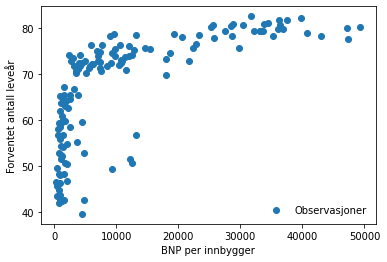

In [3]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Forventet antall leveår')
ax.set_xlabel('BNP per innbygger')

#plotting the function:
ax.scatter(g['gdp_cap'], g['life_exp'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

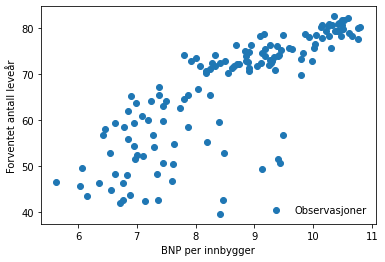

In [4]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Forventet antall leveår')
ax.set_xlabel('BNP per innbygger')

#plotting the function:
ax.scatter(np.log(g['gdp_cap']), g['life_exp'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

In [5]:
y=g['life_exp']
pd.DataFrame(y)

,life_exp
0,43.828
1,76.423
2,72.301
3,42.731
4,75.320
...,...
137,74.249
138,73.422
139,62.698
140,42.384


In [6]:
x=pd.DataFrame(np.log(g['gdp_cap']))
x['intercept']=1
x

,gdp_cap,intercept
0,6.882007,1
1,8.688964,1
2,8.736066,1
3,8.475794,1
4,9.455588,1
...,...,...
137,7.800399,1
138,8.014782,1
139,7.732268,1
140,7.147726,1


In [7]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.2
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.12e-34
Time:                        14:36:01   Log-Likelihood:                -479.26
No. Observations:                 142   AIC:                             962.5
Df Residuals:                     140   BIC:                             968.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp_cap        7.2028      0.442     16.283      0.0

In [8]:
res.params

gdp_cap      7.202802
intercept    4.949612
dtype: float64

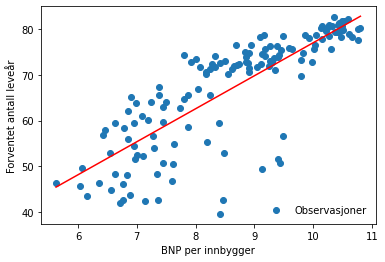

In [9]:
x=np.linspace(min(np.log(g['gdp_cap'])), max(np.log(g['gdp_cap'])), 100)

regression_line=res.params['intercept']+res.params['gdp_cap']*x

ax.plot(x, regression_line,color='red')
fig

In [12]:
beta=1
N=100
x=5+np.random.rand(N)
data=pd.DataFrame({'y':-3+beta*x+np.random.rand(N), 'x':x})
data

,y,x
0,3.305294,5.962140
1,3.066591,5.226595
2,2.365158,5.301496
3,2.543975,5.494810
4,2.119751,5.026351
...,...,...
95,3.192040,5.511627
96,2.915668,5.061504
97,2.376920,5.371901
98,2.703704,5.245603
